<a href="https://colab.research.google.com/github/saketh105/Data690/blob/main/part03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

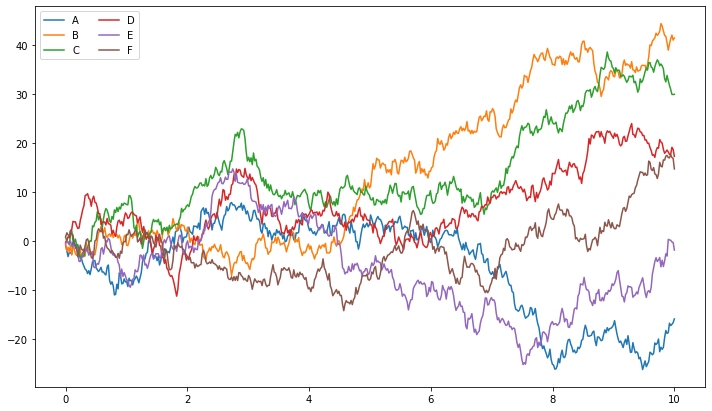

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [ ]:
import requests
import pandas as pd

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-10-02 16:13:52.818980')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-02 17:00:00,19142,19227,19135,19202,15.754174,302367.838990
2022-10-02 18:00:00,19199,19222,19169,19200,6.647455,127583.584422
2022-10-02 19:00:00,19194,19223,19158,19222,12.166681,233557.458299
2022-10-02 20:00:00,19221,19335,19221,19261,25.114571,484645.085860
2022-10-02 21:00:00,19275,19276,19230,19235,8.028262,154606.792213


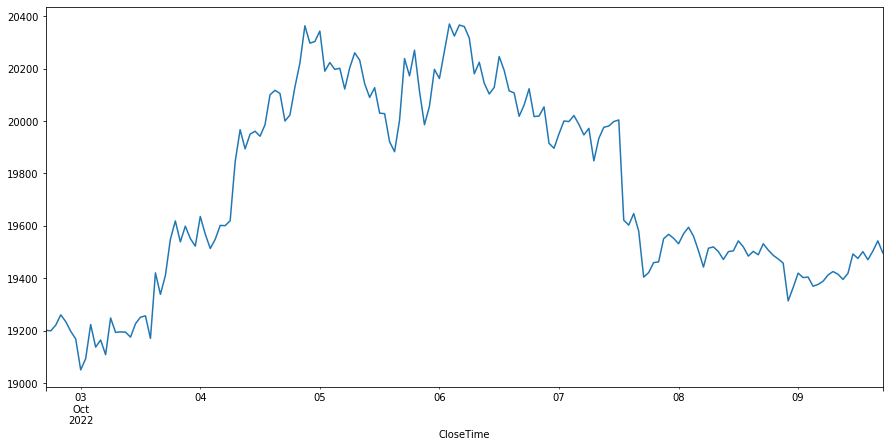

In [ ]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-02 17:00:00,1293.4,1301.8,1293.2,1296.5,216.689911,2.810810e+05
2022-10-02 18:00:00,1296.5,1298.0,1295.6,1297.8,108.349292,1.405143e+05
2022-10-02 19:00:00,1297.8,1298.1,1291.6,1296.3,192.073813,2.486376e+05
2022-10-02 20:00:00,1296.3,1312.5,1296.3,1304.6,886.002032,1.158543e+06
2022-10-02 21:00:00,1304.8,1307.3,1302.8,1302.9,277.361462,3.618270e+05


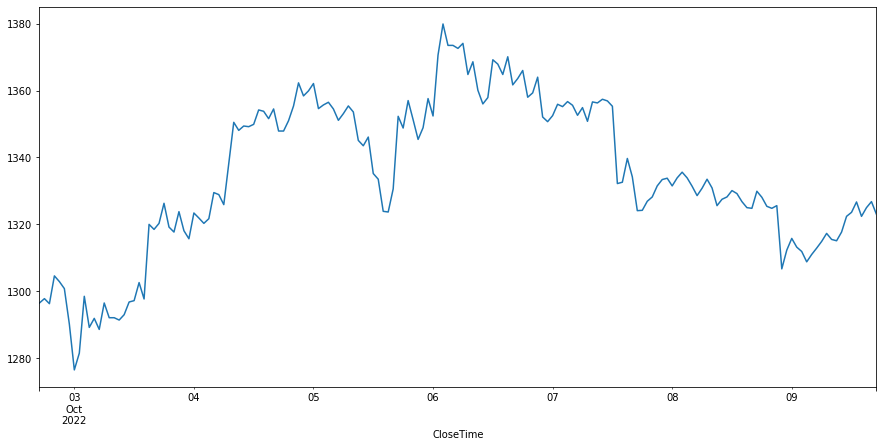

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-02 17:00:00,1293.4,1301.8,1293.2,1296.5,216.689911,2.810810e+05
2022-10-02 18:00:00,1296.5,1298.0,1295.6,1297.8,108.349292,1.405143e+05
2022-10-02 19:00:00,1297.8,1298.1,1291.6,1296.3,192.073813,2.486376e+05
2022-10-02 20:00:00,1296.3,1312.5,1296.3,1304.6,886.002032,1.158543e+06
2022-10-02 21:00:00,1304.8,1307.3,1302.8,1302.9,277.361462,3.618270e+05


In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')

In [ ]:
writer.save()